
MOTIVATION:
- Understand how well fitting works with a single feed fraction experiment. 

HYPOTHESIS:
- Low feed fractions will be difficult to fit. 


In [12]:
import numpy as np
from typing import Tuple

# import matplotlib

# matplotlib.use("webagg")
import matplotlib.pyplot as plt

from polypesto.models.CRP2 import IrreversibleCPE
from polypesto.models.CRP2 import ReversibleCPE
from polypesto.core.params import ParameterGroup
import polypesto.core.petab as pet
from polypesto.core.pypesto import create_problem_set, load_pypesto_problem
from polypesto.core.params import ParameterSet, ParameterGroup
from polypesto.utils.plot import plot_all_measurements

from pathlib import Path

import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
__file__ = "/PolyPESTO/experiments/reversible_cpe/single_rxn/analysis.ipynb"
DIR_NAME = os.path.basename(os.path.dirname(__file__))
DATA_DIR = os.path.join(os.path.dirname(__file__), "data")


# ************** Define parameters **************
def parameters() -> ParameterGroup:
    # rA = [0.1, 0.5, 1.0, 2.0, 10.0]
    # rB = [0.1, 0.5, 1.0, 2.0, 10.0]
    rA = [3]
    rB = [10]

    pg = ParameterGroup(DIR_NAME, {})
    for _rA in rA:
        for _rB in rB:
            pg.lazy_add({"rA": _rA, "rB": _rB})

    return pg


Model = ReversibleCPE


# ************** Define experiments **************
# experimental conditions, observables, and fit parameters
def experiment(t_eval, fA0s, cM0s) -> Tuple[str, pet.PetabData]:

    dir = os.path.join(DATA_DIR, f"fA0_{fA0s[0]:.2f}")

    # Define fitting parameters
    params_dict = Model.get_default_fit_params()
    param_df = pet.define_parameters(params_dict)

    # Define experimental conditions
    cond_df = Model.create_conditions(fA0s, cM0s)
    obs_df = Model.get_default_observables()
    empty_meas_df = pet.define_empty_measurements(obs_df, cond_df, t_eval)

    return dir, pet.PetabData(
        obs_df=obs_df, cond_df=cond_df, param_df=param_df, meas_df=empty_meas_df
    )


# ************** Define experiments **************
t_eval = np.arange(0, 1, 0.1, dtype=float)
fA0s = np.array([[0.75]])
cM0s = np.array([[1.0]])

for fA0, cM0 in zip(fA0s, cM0s):

    # print(fA0, cM0)
    dir, data = experiment(t_eval, fA0, cM0)
    pg = parameters()
    print(pg)
    yaml_paths = create_problem_set(Model, parameters(), data, dir)
    # break

Visualization table not available. Skipping.
Visualization table not available. Skipping.
Compiling amici model to folder /PolyPESTO/amici_models/0.30.0/reversible_cpe.
2025-02-26 02:56:58.350 - amici.petab.sbml_import - INFO - Importing model ...
2025-02-26 02:56:58.351 - amici.petab.sbml_import - INFO - Validating PEtab problem ...
Visualization table not available. Skipping.
2025-02-26 02:56:58.362 - amici.petab.sbml_import - INFO - Model name is 'reversible_cpe'.
Writing model code to '/PolyPESTO/amici_models/0.30.0/reversible_cpe'.
2025-02-26 02:56:58.362 - amici.petab.sbml_import - INFO - Species: 7
2025-02-26 02:56:58.363 - amici.petab.sbml_import - INFO - Global parameters: 23
2025-02-26 02:56:58.364 - amici.petab.sbml_import - INFO - Reactions: 0
2025-02-26 02:56:58.388 - amici.petab.sbml_import - INFO - Observables: 2
2025-02-26 02:56:58.388 - amici.petab.sbml_import - INFO - Sigmas: 2
2025-02-26 02:56:58.390 - amici.petab.sbml_import - DEBUG - Adding output parameters to mod

ParameterGroup(id='single_rxn', parameter_sets={'p_000': ParameterSet(id='p_000', parameters={'rA': Parameter(id='rA', value=3), 'rB': Parameter(id='rB', value=10)})})
Creating SBML model: reversible_cpe
Creating irreversible CRP parameters.
Creating reversile CRP parameters.
                 filename : /PolyPESTO/experiments/reversible_cpe/single_rxn/data/fA0_0.75/petab/common/reversible_cpe.xml
         file size (byte) : 14300
           read time (ms) : 2.030134
        c-check time (ms) : 2.058029
      validation error(s) : 0
    (consistency error(s)): 0
    validation warning(s) : 0
  (consistency warning(s)): 0


2025-02-26 02:56:58.457 - amici.sbml_import - DEBUG - Finished processing SBML species            ++ (1.28E-02s)
2025-02-26 02:56:58.461 - amici.sbml_import - DEBUG - Finished processing SBML reactions          ++ (4.53E-04s)
2025-02-26 02:56:58.482 - amici.sbml_import - DEBUG - Finished processing SBML rules              ++ (1.82E-02s)
2025-02-26 02:56:58.488 - amici.sbml_import - DEBUG - Finished processing SBML events             ++ (1.69E-04s)
2025-02-26 02:56:58.492 - amici.sbml_import - DEBUG - Finished processing SBML initial assignments++ (5.12E-05s)
2025-02-26 02:56:58.496 - amici.sbml_import - DEBUG - Finished processing SBML species references ++ (1.05E-05s)
2025-02-26 02:56:58.497 - amici.sbml_import - DEBUG - Finished importing SBML                      + (9.36E-02s)
2025-02-26 02:56:58.510 - amici.sbml_import - DEBUG - Finished processing SBML observables         + (8.67E-03s)
2025-02-26 02:56:58.514 - amici.sbml_import - DEBUG - Finished processing SBML event observables

running build_ext
------------------------------ model_ext ------------------------------
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Appending flags from AMICI_CXXFLAGS: -fopenmp
-- Appending

In [53]:
yaml_paths

{'p_000': '/PolyPESTO/experiments/irreversible_cpe/single_rxn/data/fA0_0.75/petab/p_000/petab.yaml'}

Visualization table not available. Skipping.


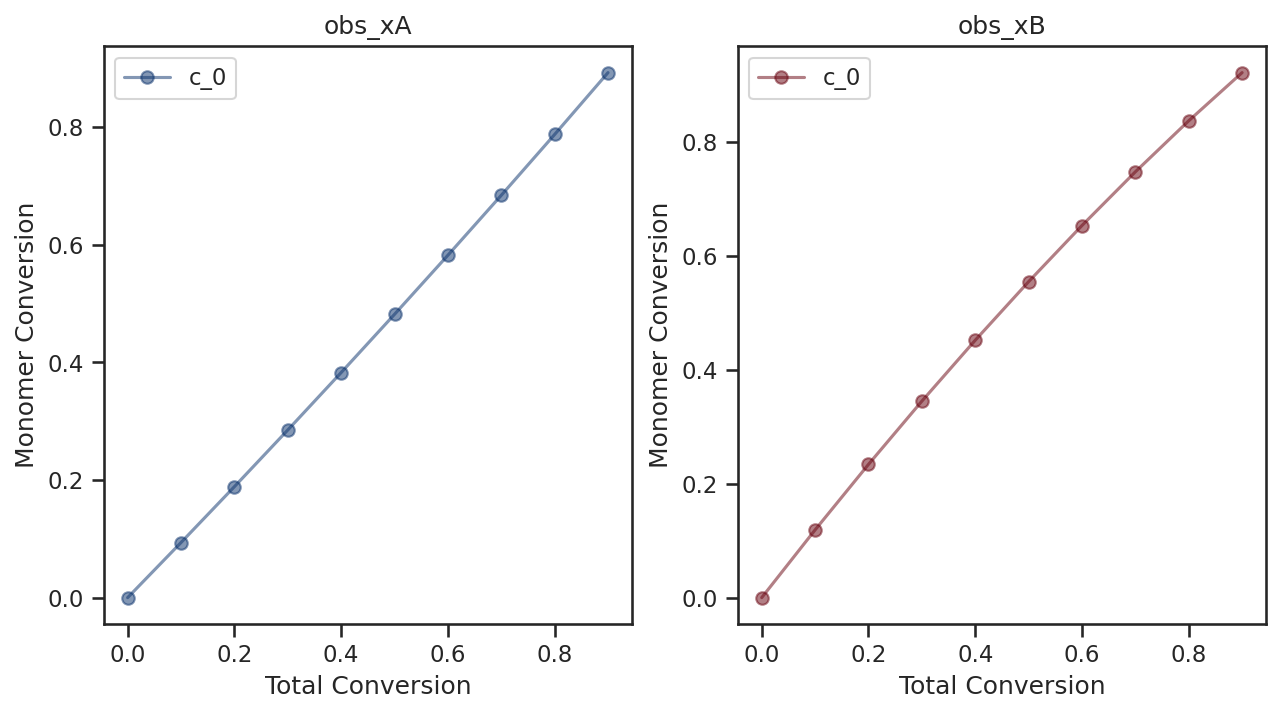

In [14]:
yaml_path = yaml_paths["p_000"]
importer, problem = load_pypesto_problem(yaml_path=yaml_path, model_name=Model.name)

plot_all_measurements(
    importer.petab_problem.measurement_df,
    # group_by=C.SIMULATION_CONDITION_ID,
    group_by=pet.C.OBSERVABLE_ID,
    format_axes_kwargs={
        "set_xlabel": "Total Conversion",
        "set_ylabel": "Monomer Conversion",
        # "set_xlim": (0, 1),
        # "set_ylim": (0, 1),
    },
    plot_style="both",
    alpha=0.5,
)
plt.show()

In [15]:
import pypesto
import pypesto.optimize as optimize
import pypesto.petab
import pypesto.sample as sample
import pypesto.visualize as visualize

optimizer = optimize.ScipyOptimizer()  # method="Nelder-Mead")  # method="Nelder-Mead")
# optimizer = optimize.PyswarmOptimizer()
history_options = pypesto.HistoryOptions(
    trace_record=True,  # storage_file="history_{id}.csv"
)
engine = pypesto.engine.MultiProcessEngine()
n_starts = 1000

# run optimization of problem 1
import amici

# Create solver instance
# solver = model.getSolver()

# Increase maximum number of steps
problem.objective.amici_solver.setMaxSteps(
    10000
)  # Default is often too low for stiff systems

# problem.objective.sol
# Adjust error tolerances
problem.objective.amici_solver.setAbsoluteTolerance(1e-10)  # Tighter for accuracy
problem.objective.amici_solver.setRelativeTolerance(1e-8)

# Adjust Newton step settings for algebraic equations
# problem.objective.amici_solver.setMaxNewtonStep(50)  # More iterations for convergence

# For stiff systems near equilibrium
problem.objective.amici_solver.setStabilityLimitFlag(True)

# Enable more robust integration near steady-state
# problem.objective.amici_solver.setSteadyStateSensitivityMode(
#     amici.SensitivityMethod.adjoint
# )
optimizer = optimize.ScipyOptimizer()  # method="Nelder-Mead")  # method="Nelder-Mead")
history_options = pypesto.HistoryOptions(
    trace_record=True,  # storage_file="history_{id}.csv"
)
engine = pypesto.engine.MultiProcessEngine()
n_starts = 100

problem.objective.amici_solver.setMaxStepSize(1e-3)
result = optimize.minimize(
    problem=problem,
    optimizer=optimizer,
    n_starts=n_starts,
    engine=engine,
    history_options=history_options,
)

Engine will use up to 8 processes (= CPU count).
Engine will use up to 8 processes (= CPU count).
  0%|                                                                                                              | 0/100 [00:00<?, ?it/s]2025-02-26 02:57:41.627 - amici.swig_wrappers - ERROR - [c_0][OTHER] AMICI simulation failed: Wrapping of DAEs is not yet implemented from Python
2025-02-26 02:57:41.626 - amici.swig_wrappers - DEBUG - [c_0][idas:IDAHandleFailure:CONV_FAILURE] At t = 0.788 and h = 1.90735e-09, the corrector convergence failed repeatedly or with |h| = hmin.
2025-02-26 02:57:41.627 - amici.swig_wrappers - DEBUG - [c_0][idas_ic:IDAICFailFlag:CONV_FAILURE] Newton/Linesearch algorithm failed to converge.
2025-02-26 02:57:41.627 - amici.swig_wrappers - DEBUG - [c_0][idas_ic:IDAICFailFlag:CONV_FAILURE] Newton/Linesearch algorithm failed to converge.
2025-02-26 02:57:41.650 - amici.swig_wrappers - ERROR - [c_0][OTHER] AMICI simulation failed: IDA routine IDACalcIC failed with e

KeyboardInterrupt: 

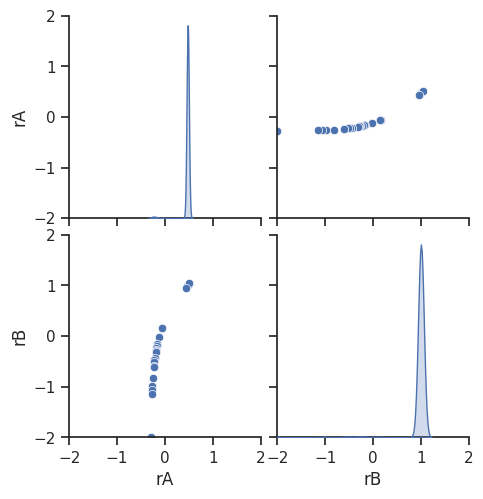

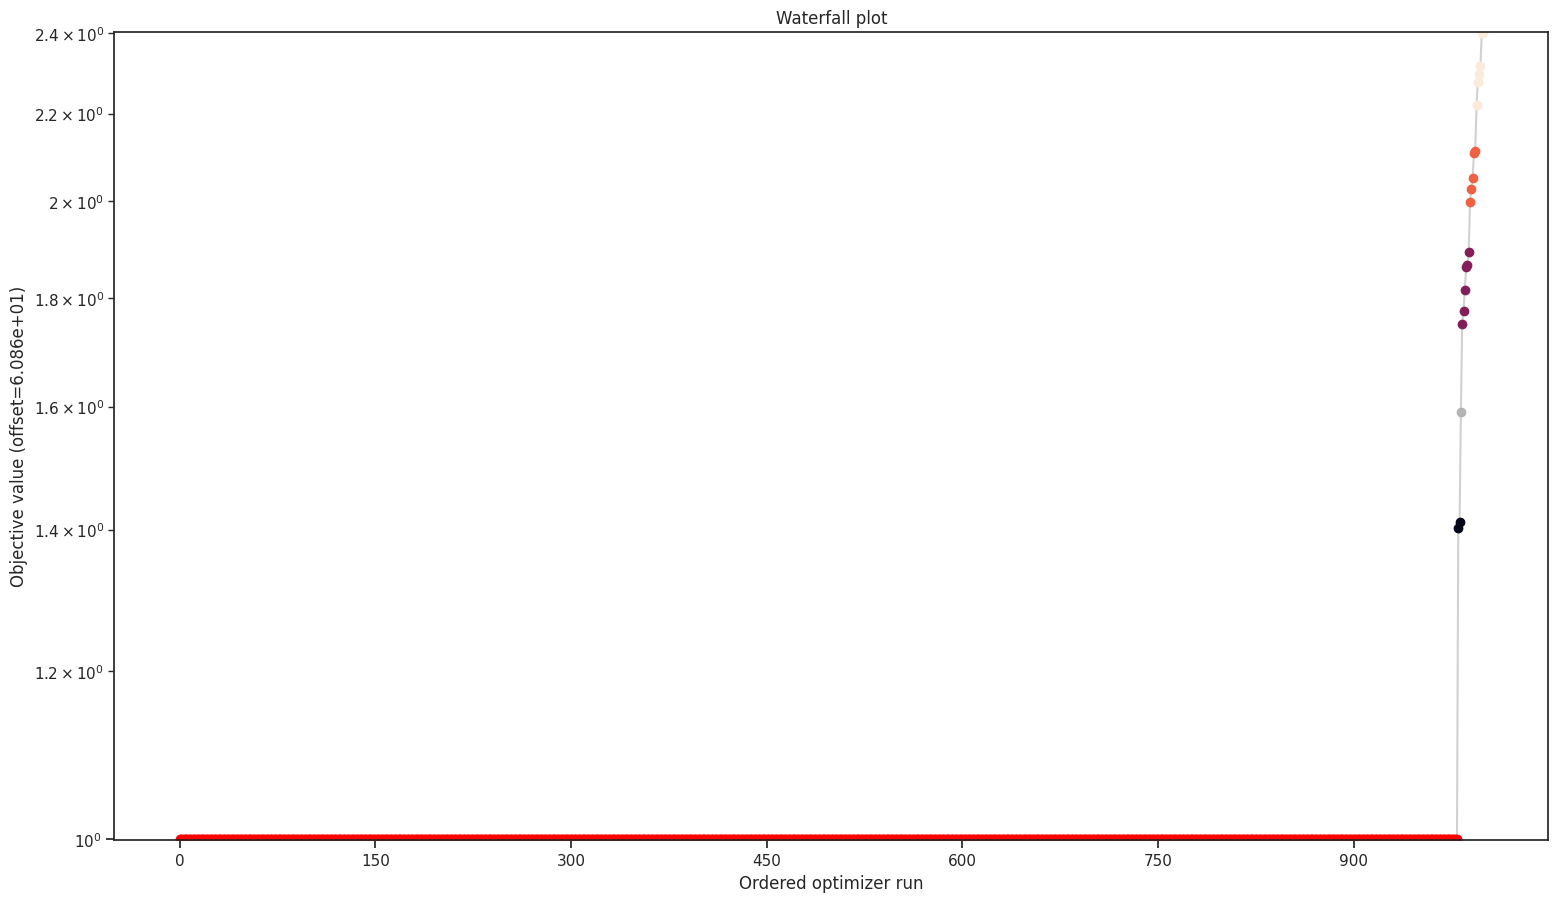

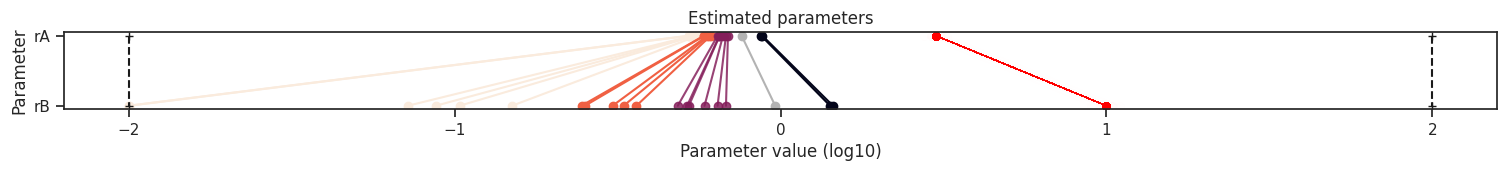

In [8]:
ax = visualize.optimization_scatter(result=result, show_bounds=True)
ax = visualize.waterfall(result)
ax = visualize.parameters(result)

In [9]:
sampler = sample.AdaptiveParallelTemperingSampler(
    internal_sampler=sample.AdaptiveMetropolisSampler(),
    n_chains=3,
    # betas=[1, 0.5, 0.1, 0.05],
    # options=dict(max_temp=10),
)
# sampler = sample.AdaptiveMetropolisSampler()
# sampler = sample.MetropolisSampler()
# problem.objective.amici_solver.setMaxStepSize(1e-3)
n_samples = 10000
result = sample.sample(
    problem,
    n_samples=n_samples,
    sampler=sampler,
    # x0=result.optimize_result.list[0]["x"][0:2],
    # x0=np.array([0, 0]),
    filename=None,
    result=result,
)
elapsed_time = result.sample_result.time
print(f"Elapsed time: {round(elapsed_time,2)}")

Initializing betas with "near-exponential decay".
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:11<00:00, 864.36it/s]
Elapsed time: 11.589874529000001


Elapsed time: 11.59


/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:79: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  _, params_fval, _, _, _ = get_data_to_plot(


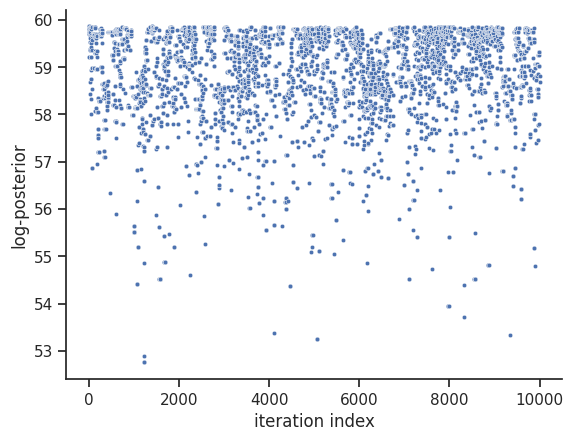

In [10]:
ax = visualize.sampling_fval_traces(result)

/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1117: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(


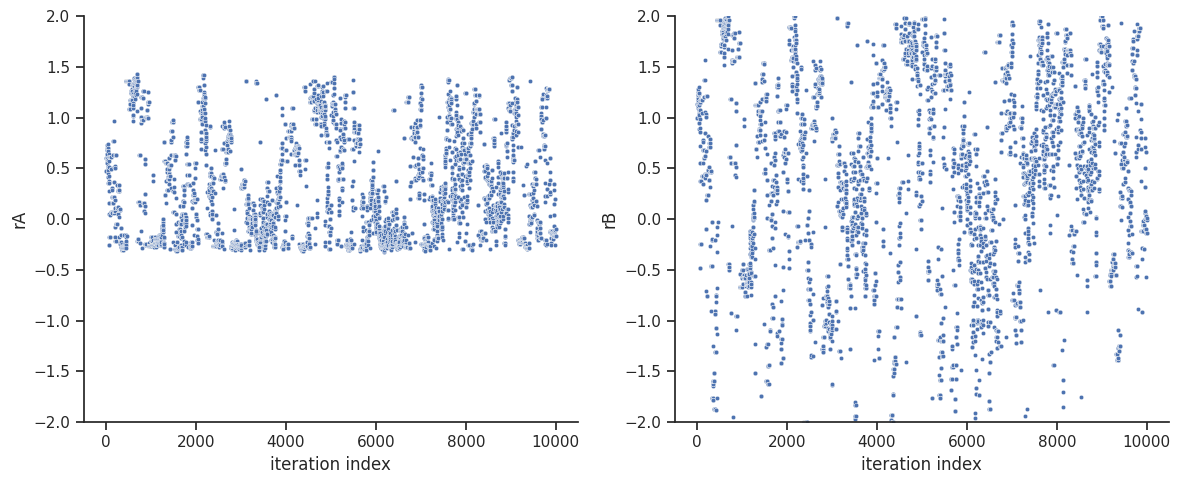

In [11]:
ax = visualize.sampling_parameter_traces(result, use_problem_bounds=True, size=(12, 5))


# pg = pg.by_id("p2").to_dict()

# ax[0][0].plot([0, n_samples], np.log10([p["rA"], p["rA"]]), "r--")
# ax[0][1].plot([0, n_samples], np.log10([p["rB"], p["rB"]]), "r--")
# ax[0][0].plot([0, n_samples], ([p["rA"], p["rA"]]), "r--")
# ax[0][1].plot([0, n_samples], ([p["rB"], p["rB"]]), "r--")
# ax[1][0].plot([0, n_samples], [p["KAA"], p["KAA"]], "r--")
# ax[1][1].plot([0, n_samples], [p["KBA"], p["KBA"]], "r--")

In [75]:
from pypesto.C import AMICI_STATUS, AMICI_T, AMICI_X, AMICI_Y
from pypesto.predict import AmiciPredictor


# This post_processor will transform the output of the simulation tool
# such that the output is compatible with the next steps.
def post_processor(amici_outputs, output_type, output_ids):
    outputs = [
        (
            amici_output[output_type]
            if amici_output[AMICI_STATUS] == 0
            else np.full((len(amici_output[AMICI_T]), len(output_ids)), np.nan)
        )
        for amici_output in amici_outputs
    ]
    return outputs


# Setup post-processors for both states and observables.
from functools import partial

amici_objective = result.problem.objective
state_ids = amici_objective.amici_model.getStateIds()
observable_ids = amici_objective.amici_model.getObservableIds()
post_processor_x = partial(
    post_processor,
    output_type=AMICI_X,
    output_ids=state_ids,
)
post_processor_y = partial(
    post_processor,
    output_type=AMICI_Y,
    output_ids=observable_ids,
)

# Create pyPESTO predictors for states and observables
predictor_x = AmiciPredictor(
    amici_objective,
    post_processor=post_processor_x,
    output_ids=state_ids,
)
predictor_y = AmiciPredictor(
    amici_objective,
    post_processor=post_processor_y,
    output_ids=observable_ids,
)

from pypesto.C import EnsembleType
from pypesto.ensemble import Ensemble

# corresponds to only the estimated parameters
x_names = result.problem.get_reduced_vector(result.problem.x_names)

# Create the ensemble with the MCMC chain from parallel tempering with the real temperature.
ensemble = Ensemble.from_sample(
    result,
    chain_slice=slice(
        None, None, 5
    ),  # Optional argument: only use every fifth vector in the chain.
    x_names=x_names,
    ensemble_type=EnsembleType.sample,
    lower_bound=result.problem.lb,
    upper_bound=result.problem.ub,
)

Geweke burn-in index: 0


In [76]:
result.sample_result.betas

array([1.00000000e+00, 1.21582519e-02, 2.00000000e-05])

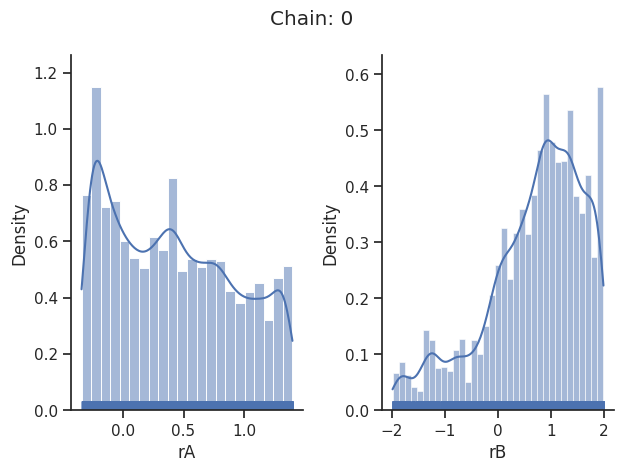

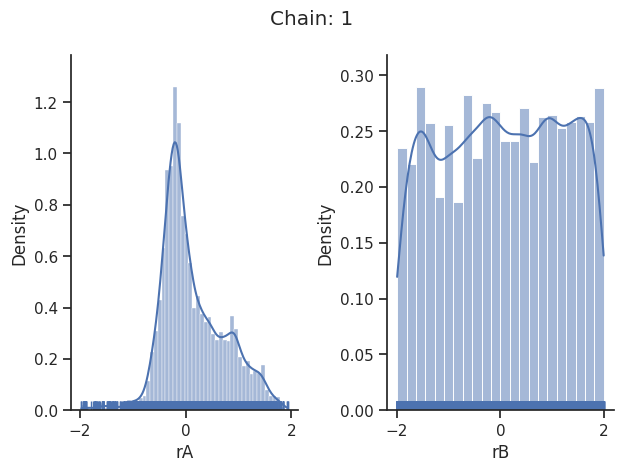

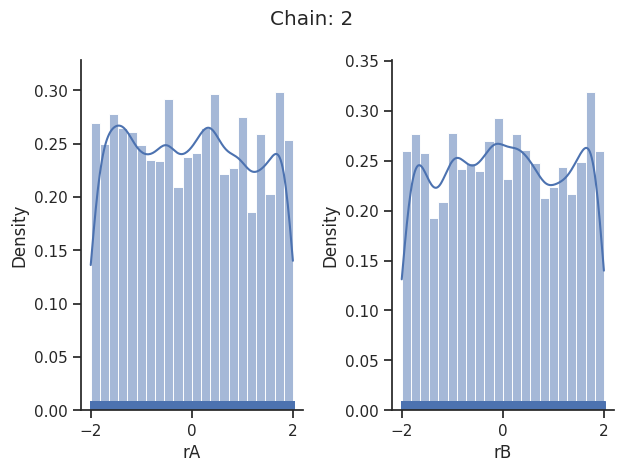

In [77]:
for i_chain in range(len(result.sample_result.betas)):
    visualize.sampling_1d_marginals(
        result,
        i_chain=i_chain,
        suptitle=f"Chain: {i_chain}",
    )

Engine will use up to 8 processes (= CPU count).


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 22.27it/s]


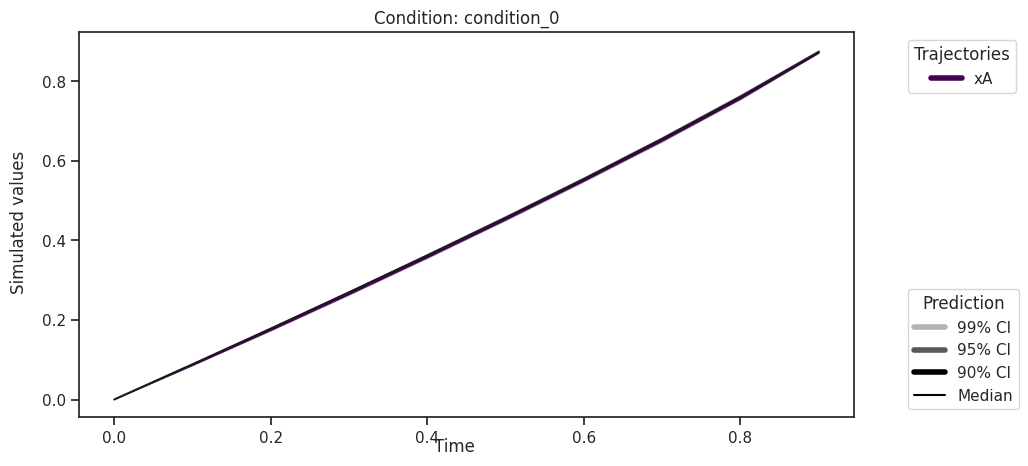

In [37]:
from pypesto.engine import MultiProcessEngine

engine = MultiProcessEngine()

ensemble_prediction = ensemble.predict(
    predictor_x, prediction_id=AMICI_X, engine=engine
)
from pypesto.C import CONDITION, OUTPUT

credibility_interval_levels = [90, 95, 99]

ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    size=(10, 5),
    # labels={"A": "state_A", "condition_0": "cond_0"},
    axis_label_padding=60,
    groupby=CONDITION,
    # condition_ids=["condition_0", "condition_1", "condition_2"],  # `None` for all conditions
    # output_ids=["A", "B"],  # `None` for all outputs
)

In [18]:
petab_problem = importer.petab_problem

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.47it/s]


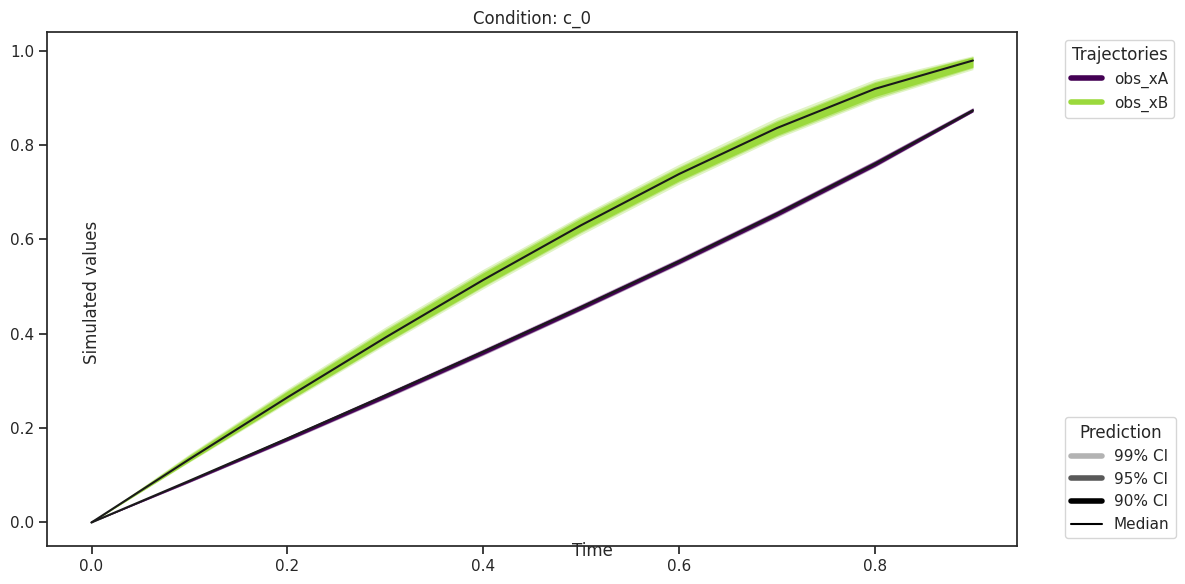

In [19]:
def show_measurement_fit(petab_problem, engine):

    mdf = petab_problem.measurement_df
    # Create a custom objective with new output timepoints.
    conditions = mdf[pet.C.SIMULATION_CONDITION_ID].unique()
    timepoints = [
        mdf[mdf[pet.C.SIMULATION_CONDITION_ID] == c][pet.C.TIME].unique()
        for c in conditions
    ]
    amici_objective_custom = amici_objective.set_custom_timepoints(
        timepoints=timepoints
    )

    # Create an observable predictor with the custom objective.
    predictor_y_custom = AmiciPredictor(
        amici_objective_custom,
        post_processor=post_processor_y,
        output_ids=observable_ids,
        condition_ids=[edata.id for edata in amici_objective_custom.edatas],
    )

    # Predict then plot.
    ensemble_prediction = ensemble.predict(
        predictor_y_custom, prediction_id=AMICI_Y, engine=engine
    )

    ax = visualize.sampling_prediction_trajectories(
        ensemble_prediction,
        levels=credibility_interval_levels,
        groupby=CONDITION,
        # measurement_df=mdf,
        size=(12, 6),
    )

    return ax


# import matplotlib.pyplot as plt
# ax[0][0].set_title('')
# ax[1][0].set_title('')
# ax[0][1].set_title('')
# # ax[1][1].set_title('')
# ax[0][0].set_ylim([-0.1, 2.1])
# ax[1][0].set_ylim([-0.1, 2.1])
# ax[0][1].set_ylim([-0.1, 2.1])
# ax[1][1].set_ylim([-0.1, 2.1])

ax = show_measurement_fit(petab_problem, engine)
plt.tight_layout()
fig = ax[0][0].get_figure()
fig.savefig("FRP2_measurement_fit.png")
plt.show()

In [31]:
def visualize_sampling_results(result, petab_problem, engine=None):
    """
    Visualize how sampled parameters predict the data with credibility intervals.

    Parameters:
    -----------
    result : pypesto.Result
        PyPESTO result object containing sampling results
    petab_problem : petab.Problem
        PEtab problem definition
    engine : pypesto.Engine, optional
        Engine for parallel computation

    Returns:
    --------
    ax : matplotlib.axes
        The axes with the plotted results
    """
    # Create an ensemble from the sampling results
    # Skip burn-in period (first 20% of samples)
    samples = result.sample_result.trace_x[0]
    burnin = int(len(samples) * 0.2)
    samples_subset = samples[burnin::10]  # Take every 10th sample to reduce computation
    print(samples_subset)

    # Create the ensemble
    ensemble = pypesto.ensemble.Ensemble(samples_subset)
    print(ensemble)
    # Get measurement data frame
    mdf = petab_problem.measurement_df

    # Extract unique conditions and timepoints
    conditions = mdf[pet.C.SIMULATION_CONDITION_ID].unique()
    timepoints = [
        mdf[mdf[pet.C.SIMULATION_CONDITION_ID] == c][pet.C.TIME].unique()
        for c in conditions
    ]
    print(timepoints)
    # Create custom objective with these timepoints
    amici_objective_custom = result.problem.objective.set_custom_timepoints(
        timepoints=timepoints
    )

    # Define the observable IDs (based on your model)
    observable_ids = petab_problem.observable_df.index.tolist()

    # Create predictor with the custom objective
    predictor_y_custom = pypesto.predict.AmiciPredictor(
        amici_objective_custom,
        # Use appropriate post-processor for your model
        condition_ids=[edata.id for edata in amici_objective_custom.edatas],
        output_ids=observable_ids,
    )

    # Define credibility interval levels
    credibility_interval_levels = [0.5, 0.95]  # 50% and 95% CI

    # Predict then plot
    ensemble_prediction = ensemble.predict(
        predictor_y_custom,  # prediction_id="y_model", engine=engine
    )

    # Create visualizations
    ax = pypesto.visualize.sampling_prediction_trajectories(
        ensemble_prediction,
        levels=credibility_interval_levels,
        groupby="condition",
        measurement_df=mdf,  # Include measurements
        size=(12, 6),
    )

    # Customize the plot if needed
    for row in ax:
        for subplot in row:
            subplot.set_ylim([-0.1, 2.1])  # Adjust based on your data range

    plt.tight_layout()
    return ax


petab_problem = importer.petab_problem
visualize_sampling_results(result, petab_problem)

[[-0.30112783  0.01475155]
 [-0.31431681 -0.09716697]
 [-0.39418359 -0.37288301]
 ...
 [-0.37327169 -0.20014875]
 [-0.29470033  0.05037116]
 [-0.29470033  0.05037116]]
[array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])]


  0%|                                                                                                                | 0/2 [00:00<?, ?it/s]


ValueError: shape mismatch: value array of shape (0,) could not be broadcast to indexing result of shape (2,)

In [25]:
samples = result.sample_result.trace_x[0]
samples[10::10]

array([[-0.31629117, -0.04771733],
       [-0.31783737, -0.03375735],
       [-0.32395645, -0.07154124],
       ...,
       [-0.37327169, -0.20014875],
       [-0.29470033,  0.05037116],
       [-0.29470033,  0.05037116]], shape=(1000, 2))